In [1]:
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mnistgm.experiment import MNISTGM

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['text.usetex'] = False

In [2]:
# EXP_DIR = 'runs/MNIST_GM/joint_elbo/laplace_normal/GM_MNIST_2022_01_19_19_48_02_758796/'
EXP_DIR = 'runs/MNIST_GM/poe/laplace_normal/GM_MNIST_2022_01_19_19_50_41_674331/'
# EXP_DIR = 'runs/MNIST_GM/moe/laplace_normal/GM_MNIST_2022_01_19_19_53_53_870438/'

In [ ]:
flags = torch.load(os.path.join(EXP_DIR, 'flags.rar'))

In [ ]:
flags.reweight_rec, flags.GM_radius

In [ ]:
exp = MNISTGM(flags, [])

In [ ]:
vae = exp.mm_vae

In [ ]:
vae.load_state_dict(torch.load(os.path.join(EXP_DIR, 'checkpoints/0039/mm_vae')))

In [ ]:
dataset = exp.dataset_test
test_loader = torch.utils.data.DataLoader(dataset, batch_size=200, shuffle=True)

In [ ]:
for (data, label) in test_loader:
    for key in data.keys():
        data[key] = data[key].to(flags.device)
    results = vae(data)
    break

In [ ]:
rec_mnist = results['rec']['mnist'].mean
rec_gm = results['rec']['gm'].mean

In [ ]:
ncols = min(rec_mnist.shape[0], 20)
fig, ax = plt.subplots(nrows=2, ncols=ncols, figsize=(15, 1.5))
for i, aux in enumerate(zip(data['mnist'], rec_mnist)):
    if i >= ncols:
        break
    for j, im in enumerate(aux):
        ax[j, i].imshow(im.detach().cpu().numpy().reshape(28, 28), cmap='gray')
        ax[j, i].set_xticks([])
        ax[j, i].set_yticks([])
ax[1, 0].set_ylabel('Rec', fontsize=24)
fig.tight_layout(pad=0)

In [ ]:
fig, ax = plt.subplots(1, figsize=(5, 5))
for i in range(8):
    ax.scatter(*rec_gm[label==i+1].detach().cpu().numpy().T, c='C%d'%i, s=10, zorder=2)
    ax.scatter(*data['gm'][label==i+1].detach().cpu().numpy().T, c='C%d'%i, marker='x', zorder=3)
ax.set_yticks([-2.5, 0, 2.5])
ax.set_xticks([-2.5, 0, 2.5])
ax.plot([], [], marker='.', c='k', alpha=1, label='Rec.', linewidth=0)
ax.plot([], [], marker='x', c='k', alpha=1, label='Truth', linewidth=0)
fig.legend(fontsize='small', loc=(0.71, 0.11), ncol=1, handletextpad=0, labelspacing=0)
fig.tight_layout()

In [20]:
exps = dict()
results = dict()
truths = dict()
for modname in ('joint_elbo', 'moe', 'poe'):
    exps[modname] = dict()
    results[modname] = dict()
    truths[modname] = dict()
    for rad in (2, 3, 4, 5):
        exps[modname][rad] = []
        results[modname][rad] = []
        truths[modname][rad] = []
        for rew in ('w', 'wo'):
            path = 'runs/MNIST_GM/%s/laplace_normal/%srew_rad%d' % (modname, rew, rad)
            flags = torch.load(os.path.join(path, 'flags.rar'))
            exp = MNISTGM(flags, [])
            exps[modname][rad].append(exp)
            vae = exp.mm_vae
            vae.load_state_dict(torch.load(os.path.join(path, 'checkpoints/0039/mm_vae')))
            dataset = exp.dataset_test
            test_loader = torch.utils.data.DataLoader(dataset, batch_size=400, shuffle=True)
            for (data, label) in test_loader:
                for key in data.keys():
                    data[key] = data[key].to(flags.device)
                res = vae(data)
                break
            truths[modname][rad].append((data, label))
            results[modname][rad].append(res)

dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'rand

# Plotting

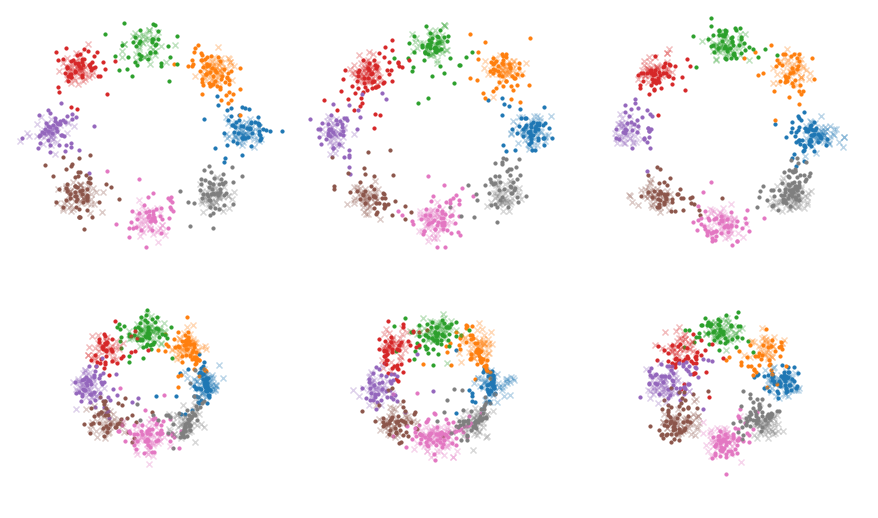

In [26]:
# With reweighting
angles = np.pi * np.arange(8) / 4
subangles = np.linspace(0, np.pi * 2)

idx = (5, 3)
fig, ax = plt.subplots(nrows=len(idx), ncols=3, figsize=(12, 3.5*len(idx)), sharex='all', sharey='all')
for k, modname in enumerate(('joint_elbo', 'moe', 'poe')):
    for j, rad in enumerate(idx):
        gm_locs = np.array([[rad * np.cos(a), rad * np.sin(a)] for a in angles])
        
        rec_gm = results[modname][rad][0]['rec']['gm'].mean
        data, label = truths[modname][rad][0]
        for i in range(0, 8):
            ax[j, k].scatter(*rec_gm[label==i+1].detach().cpu().numpy().T, c='C%d'%i, s=10, zorder=2)
            # ax[j, k].plot(np.cos(subangles) * flags.GM_var + gm_locs[i, 0], 
            #               np.sin(subangles) * flags.GM_var + gm_locs[i, 1], 
            #               c='C%d'%i)
            ax[j, k].scatter(*data['gm'][label==i+1].detach().cpu().numpy().T, c='C%d'%i, alpha=0.3, marker='x', zorder=3)
            ax[j, k].set_axis_off()
            
ax[-1, -1].set_yticks([])
ax[-1, -1].set_xticks([])
# ax[-1, -1].plot([], [], marker='.', c='k', alpha=1, label='Rec.', linewidth=0)
# ax[-1, -1].plot([], [], marker='x', c='k', alpha=1, label='Truth', linewidth=0)
# fig.legend(fontsize='small', loc=(0.71, 0.11), ncol=1, handletextpad=0, labelspacing=0)
fig.tight_layout(pad=0)
fig.savefig(os.path.join('runs/MNIST_GM/', 'with_rec_reweighting.pdf'), dpi=300)

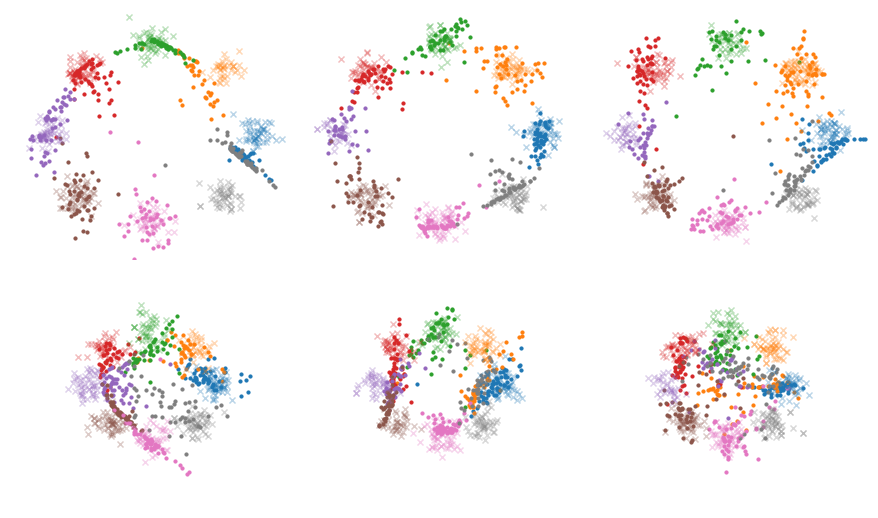

In [25]:
# Without reweighting
angles = np.pi * np.arange(8) / 4
subangles = np.linspace(0, np.pi * 2)

idx = (5, 3)
fig, ax = plt.subplots(nrows=len(idx), ncols=3, figsize=(12, 3.5*len(idx)), sharex='all', sharey='all')
for k, modname in enumerate(('joint_elbo', 'moe', 'poe')):
    for j, rad in enumerate(idx):
        gm_locs = np.array([[rad * np.cos(a), rad * np.sin(a)] for a in angles])
        
        rec_gm = results[modname][rad][1]['rec']['gm'].mean
        data, label = truths[modname][rad][1]
        for i in range(0, 8):
            ax[j, k].scatter(*rec_gm[label==i+1].detach().cpu().numpy().T, c='C%d'%i, s=10, zorder=2)
            # ax[j, k].plot(np.cos(subangles) * flags.GM_var + gm_locs[i, 0], 
            #               np.sin(subangles) * flags.GM_var + gm_locs[i, 1], 
            #               c='C%d'%i)
            ax[j, k].scatter(*data['gm'][label==i+1].detach().cpu().numpy().T, c='C%d'%i, alpha=0.3, marker='x', zorder=3)
            ax[j, k].set_xlim([-7, 7])
            ax[j, k].set_ylim([-7, 7])
            ax[j, k].set_axis_off()
            
ax[-1, -1].set_yticks([])
ax[-1, -1].set_xticks([])
# ax[-1, -1].plot([], [], marker='.', c='k', alpha=1, label='Rec.', linewidth=0)
# ax[-1, -1].plot([], [], marker='x', c='k', alpha=1, label='Truth', linewidth=0)
# fig.legend(fontsize='small', loc=(0.71, 0.11), ncol=1, handletextpad=0, labelspacing=0)
fig.tight_layout(pad=0)
fig.savefig(os.path.join('runs/MNIST_GM/', 'without_rec_reweighting.pdf'), dpi=300)

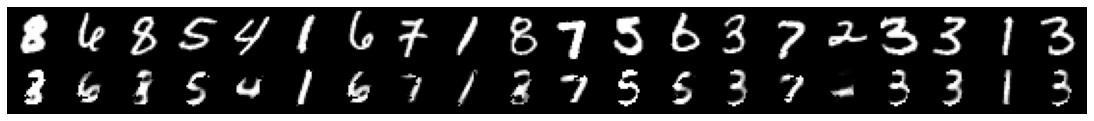

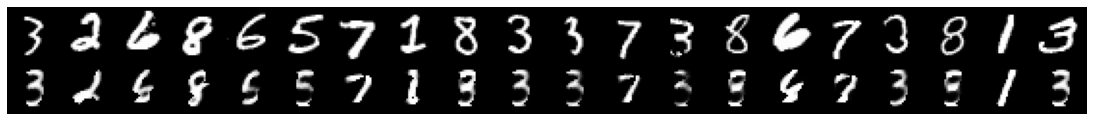

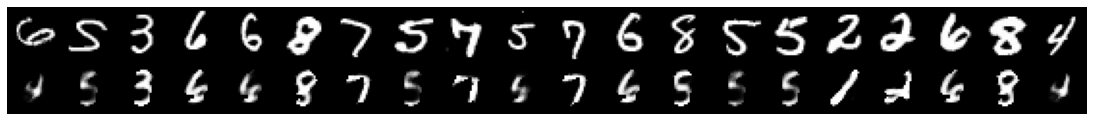

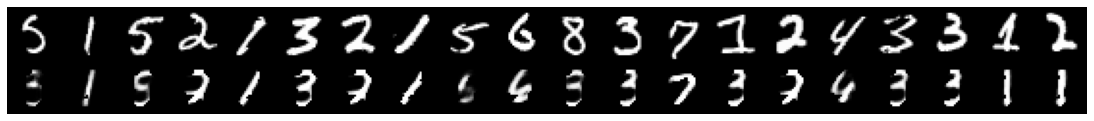

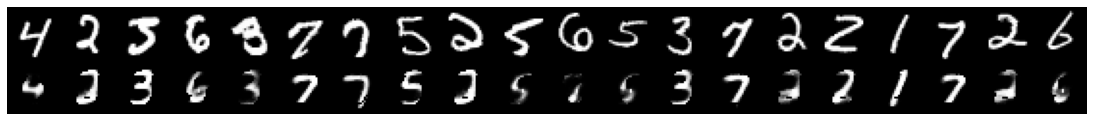

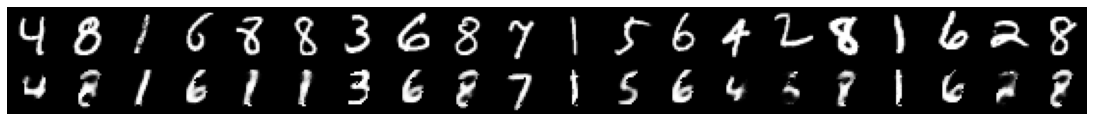

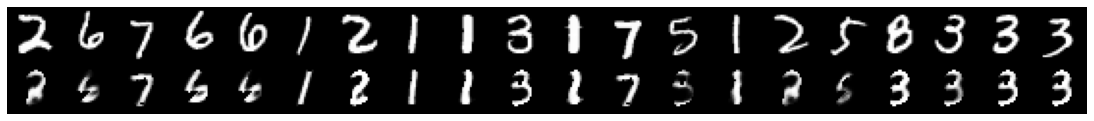

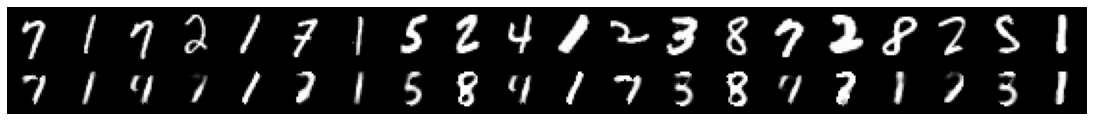

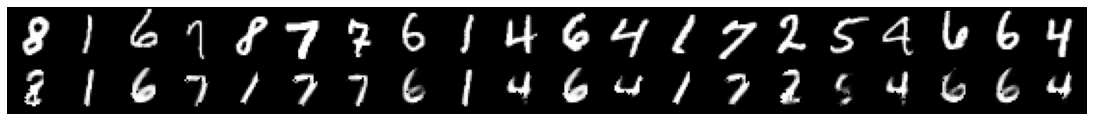

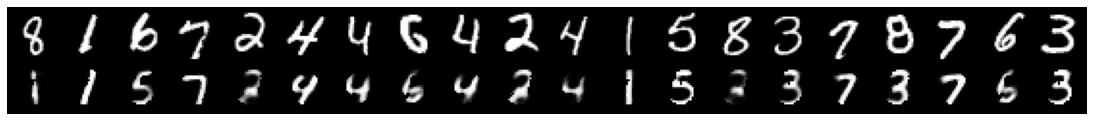

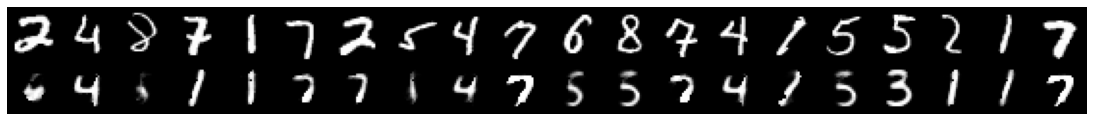

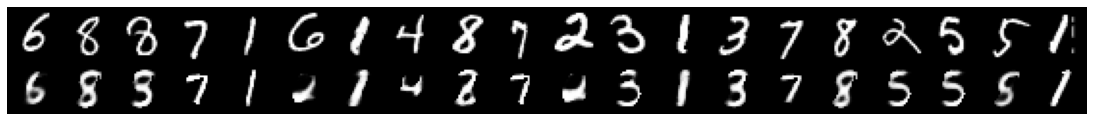

In [23]:
idx = (5, 4, 3, 2)
for k, (modname, modelname) in enumerate(zip(('joint_elbo', 'moe', 'poe'), ('MoPoVAE', 'MMVAE', 'MVAE'))):
    for j, rad in enumerate(idx):
        rec_mnist = results[modname][rad][1]['rec']['mnist'].mean
        data, label = truths[modname][rad][1]
        ncols = min(rec_mnist.shape[0], 20)
        fig, ax = plt.subplots(nrows=2, ncols=ncols, figsize=(15, 1.5))
        for i, aux in enumerate(zip(data['mnist'], rec_mnist)):
            if i >= ncols:
                break
            for j, im in enumerate(aux):
                ax[j, i].imshow(im.detach().cpu().numpy().reshape(28, 28), cmap='gray')
                ax[j, i].set_axis_off()
        fig.tight_layout(pad=0)
        fig.savefig(os.path.join('runs/MNIST_GM/', '%s_%d_wo.png' % (modelname, rad)), dpi=300)

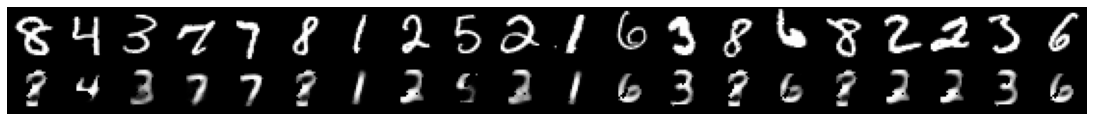

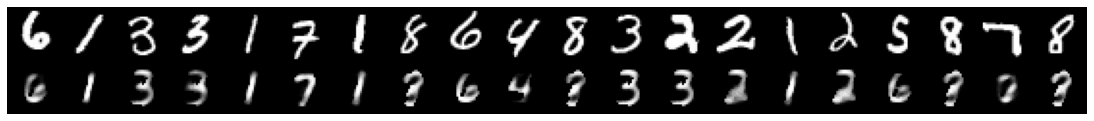

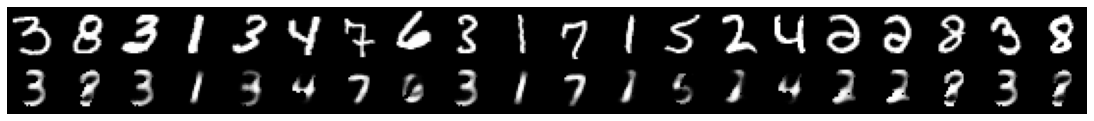

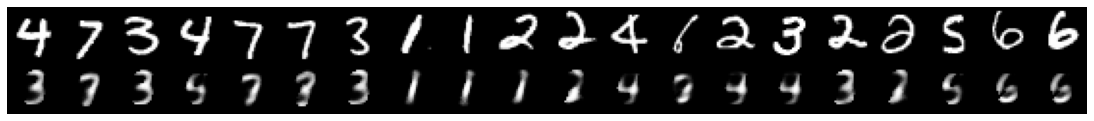

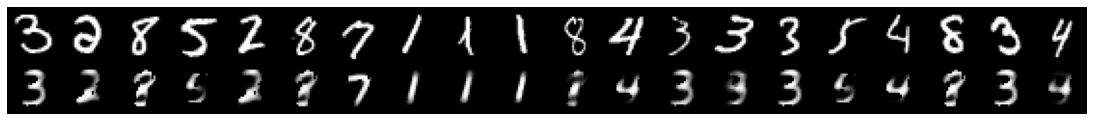

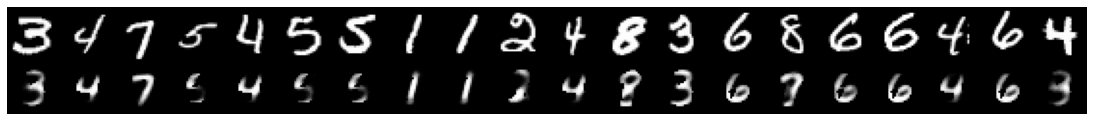

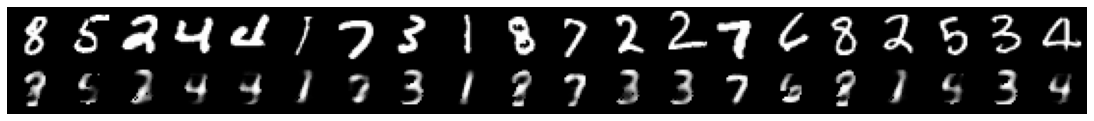

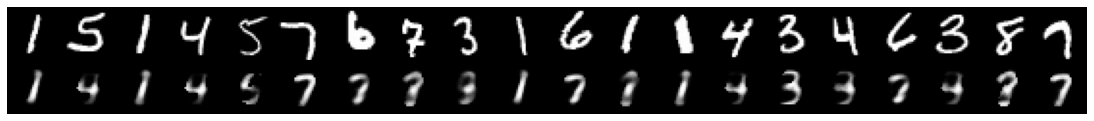

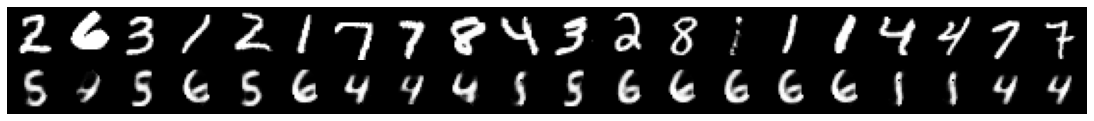

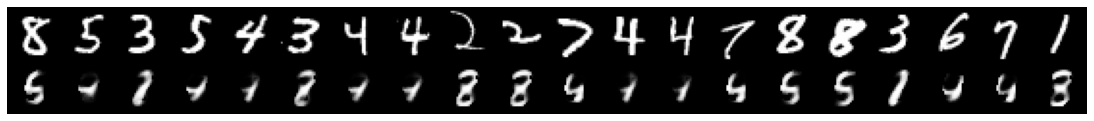

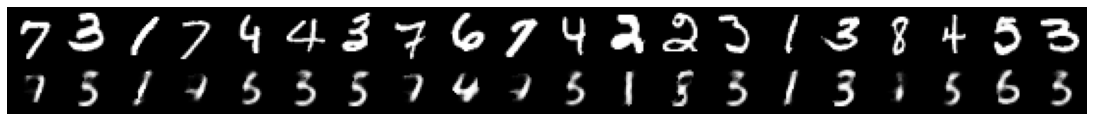

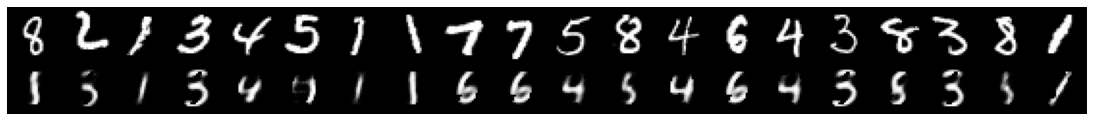

In [24]:
idx = (5, 4, 3, 2)
for k, (modname, modelname) in enumerate(zip(('joint_elbo', 'moe', 'poe'), ('MoPoVAE', 'MMVAE', 'MVAE'))):
    for j, rad in enumerate(idx):
        rec_mnist = results[modname][rad][0]['rec']['mnist'].mean
        data, label = truths[modname][rad][0]
        ncols = min(rec_mnist.shape[0], 20)
        fig, ax = plt.subplots(nrows=2, ncols=ncols, figsize=(15, 1.5))
        for i, aux in enumerate(zip(data['mnist'], rec_mnist)):
            if i >= ncols:
                break
            for j, im in enumerate(aux):
                ax[j, i].imshow(im.detach().cpu().numpy().reshape(28, 28), cmap='gray')
                ax[j, i].set_axis_off()
        fig.tight_layout(pad=0)
        fig.savefig(os.path.join('runs/MNIST_GM/', '%s_%d_w.png' % (modelname, rad)), dpi=300)

In [2]:
# metric = {'model': [], 'radius': [], 'rec': [], 'data': [], 'cluster ID': [], 'train ID': []}
metric = {'model': [], 'radius': [], 'distance': [], 'cluster ID': [], 'train ID': []}

for k, (modname, modelname) in enumerate(zip(('joint_elbo', 'moe', 'poe'), ('MoPoVAE', 'MMVAE', 'MVAE'))):
    parent_folder = 'runs/MNIST_GM/%s/laplace_normal/' % modname
    paths = os.listdir(parent_folder)
    counter = {2: 0, 3: 0, 4: 0, 5: 0}
    for path in paths:
        if 'wrew' in path or '.' in path:
            continue
        flags = torch.load(os.path.join(parent_folder, path, 'flags.rar'))
        flags.dir_data = os.path.join(os.path.expanduser('~'), 'Datasets')
        rad = flags.GM_radius
        counter[rad] += 1
        exp = MNISTGM(flags, [])
        vae = exp.mm_vae
        vae.load_state_dict(torch.load(os.path.join(parent_folder, path, 'checkpoints/0039/mm_vae')))
        dataset = exp.dataset_test
        test_loader = torch.utils.data.DataLoader(dataset, batch_size=8000, shuffle=True, drop_last=True)
        for i, (data, label) in enumerate(test_loader):
            if i > 0:
                break
            for key in data.keys():
                data[key] = data[key].to(flags.device)
            res = vae(data)

            for cid in range(1, 9):
                x1, x2 = res['rec']['gm'].mean[label==cid].detach(), data['gm'][label==cid].detach()
                c = x2.mean(dim=0)
                metric['cluster ID'].append(cid)
                metric['train ID'].append(counter[rad])
                metric['distance'].append(torch.linalg.norm(x1 - c, dim=1).mean().item())
                metric['radius'].append(rad)
                metric['model'].append(modelname)
                # metric['rec'].append(x1.cpu().numpy())
                # metric['data'].append(x2.cpu().numpy())
    print(counter)

/home/ziyigong/.local/lib/python3.8/site-packages/torchvision/transforms/transforms.py:287: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])
dict_keys(['real', 'rand

In [3]:
metric = pd.DataFrame(metric)
len(metric)

960

In [4]:
metric.to_csv('ssm_dist_to_c.csv', index=False)

In [ ]:
# import pickle

# with open("ssm_metric.pkl", "wb") as f:
#     pickle.dump(metric, f)